## Test

In [30]:
import pyBspline as Bs
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy
from scipy.misc import derivative
import pandas as pd

In [2]:
#definisco la dimensionaità:
# - (1,1): funzione da R in R
# - (1,2): curva in 2D (funzione da R in R^2)
# - (1,3): curva in 3D
# - (2,3): superficie in 3D
sh = Bs.shape(2,3)
sh.show()

#defiisco i knot vector
kv = Bs.knot_vector(1,5,[0,1,2,3,4,5,6])
kv.show()

#alloco la Bspline
#ATTENZIONE: devo creare un vettore di knot vector 
# di lunghezza pari alla  dimensionalità della superficie:
# [kv] per una curva
# [kv,kv] per una superficie
# è anche possibile usare knot vector diversi per "dimensioni" diverse
bs = Bs.Bspline(sh,[kv,kv])
#bs.show()

dimension   :  2
codimension :  3
polinomial degree :  1
base caridnality  :  5
knots             :  [0 1 2 3 4 5 6]


In [3]:
#cp = bs.control_points()
#print("shape: ",cp.shape)
#print("len  : ",len(cp[0]))

#bs.set_cp(0,(5.0,9.0))
#bs.show("cp")

In [4]:
bs.evaluate(  ( [5.0,2.0] , [ 5.0 ,3.0 ]  ) )

[array([0., 0., 0.]), array([0., 0., 0.])]

In [5]:
x = [ [5.0,2.0] , [5.0,2.0] , [5.0,2.0] ] #[ [1.0,4.0] , [2.0,7.0] , [5.0,4.0] , [9.0,8.0] ]
X = np.asarray(x)
print("X: ",X.size)
X.shape
X = X.reshape((int(X.size/2.0),2))
#len(X)

X:  6


## Funzioni in 1D

### Funzioni di base

In [6]:
#definisco la dimensionaità:
sh = Bs.shape(1,1)
#sh.show()

#defiisco i knot vector
P=3 #polinomial degree
N=5 #base caridnality
v = [0,0,0,1,2,3,4,4,4]#np.arange(0,P+N+1)
#print(v)
kv = Bs.knot_vector(P,N,v)
#kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv])
#bs.show()

[1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1.]


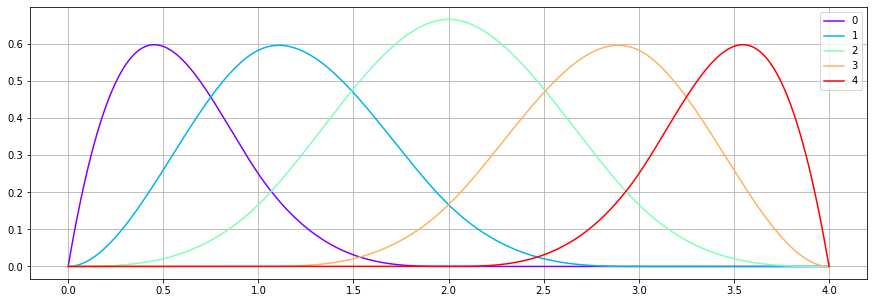

In [9]:
#grafico le funzioni di base
x = np.linspace(min(v),max(v),1000)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

for i in range(0,N):
    
    #cancello i control points
    bs.clear_cp()
    
    #imposto i coefficienti
    bs.set_cp(i,1.0)
    print(bs._cp)
    
    
    y=bs.evaluate(x)
    
    plt.plot(x, y, color= next(colors),label=str(i))
    
plt.legend()
plt.grid(True)
plt.show()

#### Derivata delle funzioni di base

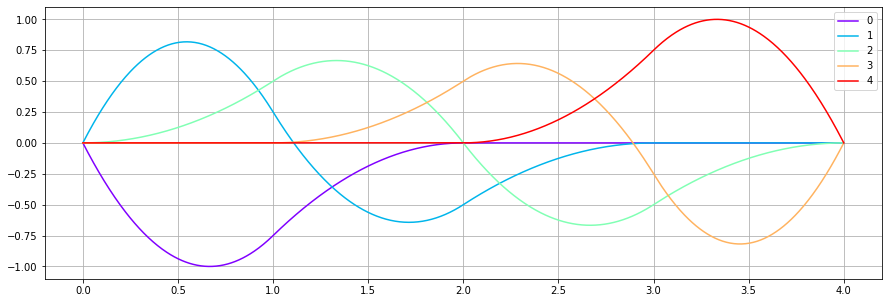

In [10]:
#grafico le funzioni di base
#x = np.linspace(min(v)+0.1,max(v)-0.1,1000,endpoint=False)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

f = lambda xx : np.asarray( bs.evaluate(xx) )

for i in range(0,N):
    
    #cancello i control points
    bs.clear_cp()
    
    #imposto i coefficienti
    bs.set_cp(i,1.0)

    #calcolo la derivata con l'algoritmo di deBoor
    der = bs.derivative()
    y   = der.evaluate(x)
    #y=bs.jacobian(x)
    
    #calcolo la derivata usando le differenze finite
    #y_diff = derivative(f, x, dx=1e-6)
    
    c = next(colors)
    plt.plot(x, y, color=c,label=str(i))
    #plt.plot(x, y_diff, color=c,linestyle="--")
    
plt.legend()
plt.grid(True)
plt.show()

#### Differenza della derivata calcola come Bpline rispetto alla derivata calcolata con gli incrementi finiti

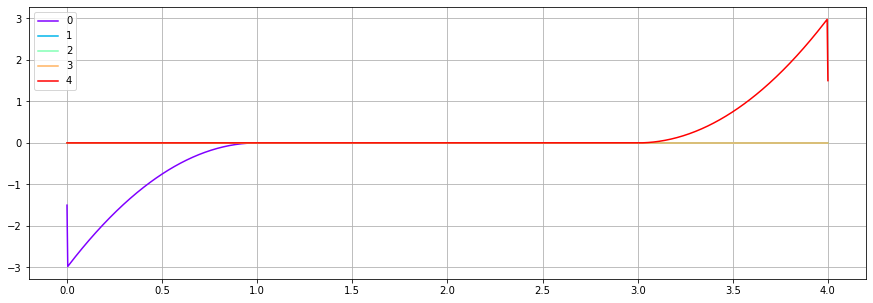

In [13]:
#grafico le funzioni di base
#x = np.linspace(min(v)+0.1,max(v)-0.1,1000,endpoint=False)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

f = lambda xx : np.asarray( bs.evaluate(xx) )

for i in range(0,N):
    
    #cancello i control points
    bs.clear_cp()
    
    #imposto i coefficienti
    bs.set_cp(i,1.0)

    #calcolo la derivata con l'algoritmo di deBoor
    der = bs.derivative()
    y   = der.evaluate(x)
    #y=bs.jacobian(x)
    
    #calcolo la derivata usando le differenze finite
    y_diff = derivative(f, x, dx=1e-8)
    
    c = next(colors)
    plt.plot(x, y-y_diff, color=c,label=str(i))
    #plt.plot(x, y_diff, color=c,linestyle="--")
    
plt.legend()
plt.grid(True)
plt.show()

#### Derivata seconda delle funzioni di base

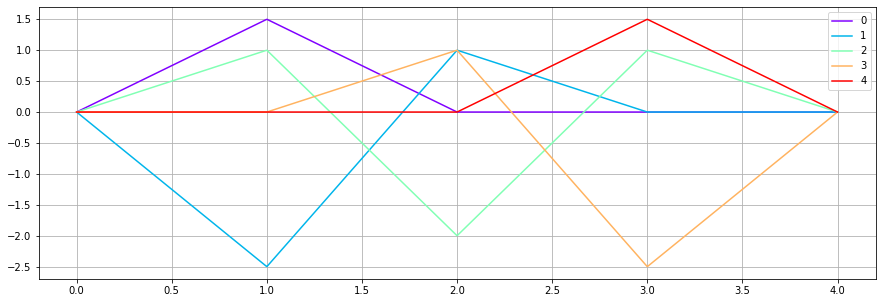

In [14]:
#grafico le funzioni di base
#x = np.linspace(min(v)+0.1,max(v)-0.1,1000,endpoint=False)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

f = lambda xx : np.asarray( bs.evaluate(xx) )

for i in range(0,N):
    
    #cancello i control points
    bs.clear_cp()
    
    #imposto i coefficienti
    bs.set_cp(i,1.0)

    #calcolo la derivata con l'algoritmo di deBoor
    der = bs.derivative(2)
    y   = der.evaluate(x)
    #y=bs.jacobian(x)
    
    #calcolo la derivata usando le differenze finite
    #y_diff = derivative(f, x, dx=1e-6)
    
    c = next(colors)
    plt.plot(x, y, color=c,label=str(i))
    #plt.plot(x, y_diff, color=c,linestyle="--")
    
plt.legend()
plt.grid(True)
plt.show()

#### Differenza della derivata seconda calcola come Bpline rispetto alla derivata calcolata con gli incrementi finiti

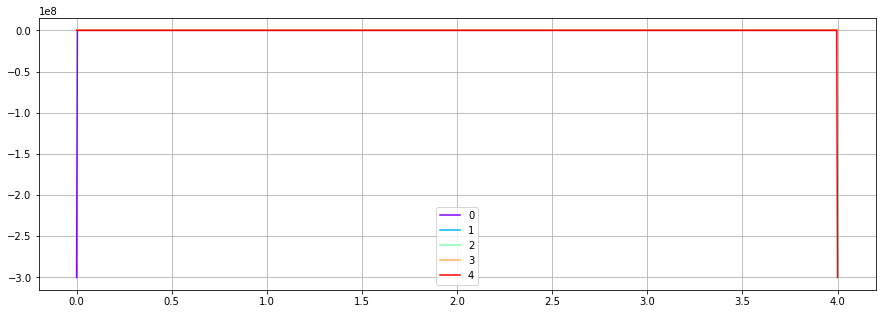

In [15]:
#grafico le funzioni di base
#x = np.linspace(min(v)+0.1,max(v)-0.1,1000,endpoint=False)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

f = lambda xx : np.asarray( bs.evaluate(xx) )

for i in range(0,N):
    
    #cancello i control points
    bs.clear_cp()
    
    #imposto i coefficienti
    bs.set_cp(i,1.0)

    #calcolo la derivata con l'algoritmo di deBoor
    der = bs.derivative(2)
    y   = der.evaluate(x)
    #y=bs.jacobian(x)
    
    #calcolo la derivata usando le differenze finite
    y_diff = derivative(f, x, dx=1e-8,n=2)
    
    c = next(colors)
    plt.plot(x, y-y_diff, color=c,label=str(i))
    #plt.plot(x, y_diff, color=c,linestyle="--")
    
plt.legend()
plt.grid(True)
plt.show()

### Funzioni in 1D

In [16]:
#definisco la dimensionaità:
sh = Bs.shape(1,1)
#sh.show()

#defiisco i knot vector
P=2 #polinomial degree
N=6 #base caridnality
#
xmin = 0.0
xmax = 4.0
#
v0,step = np.linspace(start=xmin       ,stop=xmax       ,num=N-1,retstep=True)
left    = np.arange  (start=xmin-step*P,stop=xmin       ,step=step)
right   = np.arange  (start=xmax       ,stop=xmax+step*P,step=step)
print(v0)
#print(left)
#print(right)
#v = [-3, -2,-1,0,1,2,3,4,5,6,7]#np.arange(0,P+N+1)
#
v = list(left) + list(v0) + list(right)
print(v)

#
kv = Bs.knot_vector(P,N,v)
#kv.show()
cp = np.random.rand(N)#[ 2.0, 1.0,  3.0 , -2.0 , 4.0 , 7.0 ]#, 1.0 , 4.0  ]

#alloco la Bspline
bs = Bs.Bspline(sh,[kv])
#bs.show()

[0. 1. 2. 3. 4.]
[-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 4.0, 5.0]


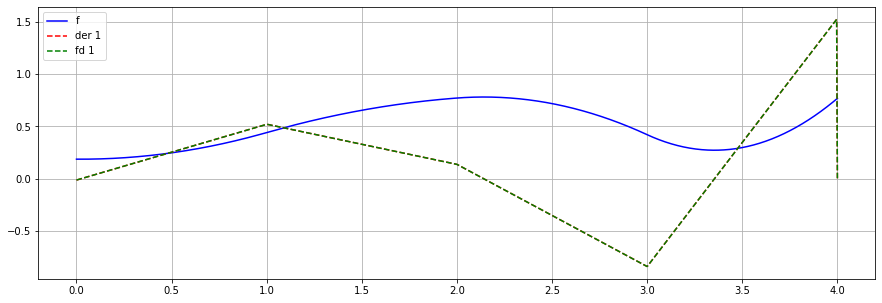

In [17]:
#grafico le funzioni di base
x = np.linspace(min(v0),max(v0),1000)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
#colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

#imposto i control points
[ bs.set_cp(i,[cp[i]]) for i in range(0,N)]

f = lambda xx : np.asarray( bs.evaluate(xx) )
    
y   = bs.evaluate(x)


der1 = bs.derivative()
der2 = bs.derivative(2)
#der3 = bs.derivative(3)

yd1  = der1.evaluate(x)
yd2  = der2.evaluate(x)
#yd3  = der3.evaluate(x)

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html
#order: int, optional Number of points to use, must be odd.


ydiff = derivative(f, x, dx=1e-4,n=1)
ydiff2 = derivative(f, x, dx=1e-4,n=2)
#ydiff3 = derivative(f, x, dx=1e-4,n=3,order=5)
    
plt.plot(x, y, color= "blue",label="f")

plt.plot(x, yd1, color= "red",label="der 1",linestyle="--")
plt.plot(x, ydiff, color= "green",label="fd 1",linestyle="--")

#plt.plot(x, yd2, color= "red",label="der 2",linestyle="--")
#plt.plot(x, ydiff2, color= "green",label="fd 2",linestyle="--")

#plt.plot(x, yd3, color= "red",label="der 3",linestyle="--")
#plt.plot(x, ydiff3, color= "green",label="fd 3",linestyle="--")

    
plt.legend()
plt.grid(True)
plt.show()

### Curva in 2D

In [55]:
#definisco la dimensionaità:
sh = Bs.shape(1,2)
#sh.show()

#defiisco i knot vector
P=2 #polinomial degree
N=6 #base caridnality
#
xmin = 0.0
xmax = 4.0
#
v0,step = np.linspace(start=xmin       ,stop=xmax       ,num=N-1,retstep=True)
left    = np.arange  (start=xmin-step*P,stop=xmin       ,step=step)
right   = np.arange  (start=xmax       ,stop=xmax+step*P,step=step)
print(v0)
#print(left)
#print(right)
#v = [-3, -2,-1,0,1,2,3,4,5,6,7]#np.arange(0,P+N+1)
#
v = list(left) + list(v0) + list(right)
print(v)

#
kv = Bs.knot_vector(P,N,v)
#kv.show()
cpx = np.random.rand(N)
cpy = np.random.rand(N)

#alloco la Bspline
bs = Bs.Bspline(sh,[kv])
#bs.show()

[0. 1. 2. 3. 4.]
[-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 4.0, 5.0]


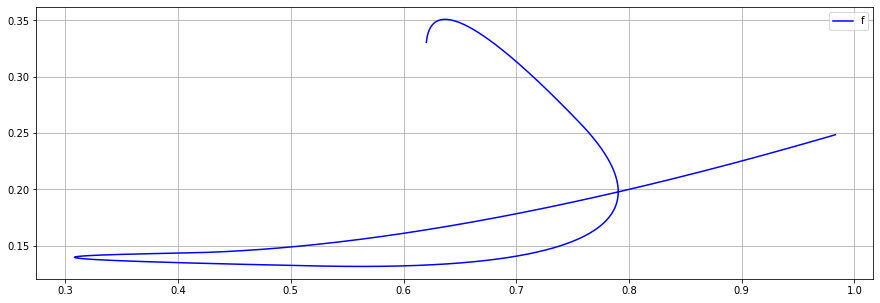

In [56]:
#grafico le funzioni di base
x = np.linspace(min(v0),max(v0),1000)

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

#imposto i control points
[ bs.set_cp(i,[cpx[i],cpy[i]]) for i in range(0,N)]

f = lambda xx : np.asarray( bs.evaluate(xx) )
    
y   = bs.evaluate(x)


#der1 = bs.derivative()
#der2 = bs.derivative(2)
#der3 = bs.derivative(3)

#yd1  = der1.evaluate(x)
#yd2  = der2.evaluate(x)
#yd3  = der3.evaluate(x)

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html
#order: int, optional Number of points to use, must be odd.


#ydiff = derivative(f, x, dx=1e-4,n=1)
#ydiff2 = derivative(f, x, dx=1e-4,n=2)
#ydiff3 = derivative(f, x, dx=1e-4,n=3,order=5)
    
    
#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
#colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#converto in dataframe
df = pd.DataFrame(y)
df = df.rename(columns={0:"x",1:"y"})
plt.plot(df["x"], df["y"], color= "blue",label="f")

#plt.plot(x, yd1, color= "red",label="der 1",linestyle="--")
#plt.plot(x, ydiff, color= "green",label="fd 1",linestyle="--")

#plt.plot(x, yd2, color= "red",label="der 2",linestyle="--")
#plt.plot(x, ydiff2, color= "green",label="fd 2",linestyle="--")

#plt.plot(x, yd3, color= "red",label="der 3",linestyle="--")
#plt.plot(x, ydiff3, color= "green",label="fd 3",linestyle="--")

    
plt.legend()
plt.grid(True)
plt.show()